# Exploratory Data Analysis

This notebook will be dedicated to performing some exploratory data analysis on the data.

In [25]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

%matplotlib inline

In [26]:
# Getting the data files
DATA_PATH = 'data/'
raw_train = pd.read_csv(DATA_PATH+'train.csv')
test = pd.read_csv(DATA_PATH+'test.csv')
sample_submission = pd.read_csv(DATA_PATH+'sample_submission.csv')

In [27]:
# Taking a look at what the sample submission looks like 
# so I know what to submit
sample_submission.head(15)

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
5,12,0
6,21,0
7,22,0
8,27,0
9,29,0


In [28]:
# Checking out the test data
test.head(15)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [29]:
# Seeing test data size
test.shape

(3263, 4)

## Training Data
Working with the training data 

In [30]:
# Checking data dimensions
raw_train.shape

(7613, 5)

In [31]:
raw_train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [32]:
raw_train.head(15)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


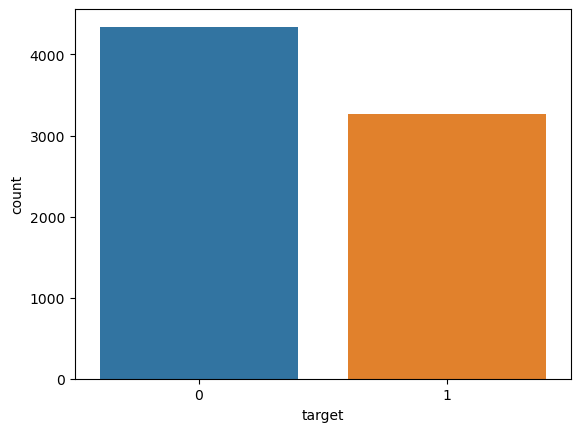

In [33]:
# Checking the distribution of the target
sns.countplot(raw_train,x='target')
plt.show()

In [34]:
# Checking the counts of the targets
raw_train['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [35]:
# Checking if id is unique
len(pd.unique(raw_train['id']))

7613

In [36]:
# Checking the missing values for each column
missing_percent_dict = {}

for column in raw_train.columns:
    missing_percent_dict[column] = sum(pd.isna(raw_train[column])) / raw_train.shape[0] * 100

missing_percent_dict

{'id': 0.0,
 'keyword': 0.8012610009194797,
 'location': 33.27203467752528,
 'text': 0.0,
 'target': 0.0}

In [37]:
# Looking at the keyword breakdown
len(pd.unique(raw_train['keyword']))

222

In [38]:
# Looking at the location breakdown
len(pd.unique(raw_train['location']))

3342

In [39]:
# Looking at the text breakdown
len(pd.unique(raw_train['text']))

7503

### Keyword feature

Does a certain keyword indicate a disaster? 

I hypothesize no since you need context and can't tell if something is a disaster based on a single keyword.

In [40]:
# Looking at what some of these keywords are
raw_train['keyword'].value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

In [52]:
# Is there a certain keyword that indicated disaster? 
# Can check this by seeing what percentage of the keyword is used in a disaster context
keyword_counts_total = dict(raw_train['keyword'].value_counts())
keyword_count_zero = dict(raw_train.loc[raw_train['target'] == 0, 'keyword'].value_counts())
keyword_count_one = dict(raw_train.loc[raw_train['target'] == 1, 'keyword'].value_counts())

# Getting the percentages for every keyword and writing them to the file
with open('keyword-dist.txt','w') as file:
    for keyword in keyword_counts_total.keys():
        file.write(f'Keyword: {keyword}\n')
        
        if keyword in keyword_count_zero.keys():
            file.write(f'0: {keyword_count_zero[keyword] / keyword_counts_total[keyword] * 100}\n')
        else:
            file.write('0: 0\n')

        if keyword in keyword_count_one.keys():
            file.write(f'1: {keyword_count_one[keyword] / keyword_counts_total[keyword] * 100}\n')
        else:
            file.write('1: 0\n')
        
        file.write(f'Total Count: {keyword_counts_total[keyword]}\n')
        file.write('\n')

File indicates that keywords do matter as certain words have a higher probability of indicating a tweet is about a disaster. For example, P(Disaster | Keyword = derailment) = 1 in 39 examples. Keywords need to be integrated into the model somehow. Maybe weighting the embeddings? 

In [53]:
# Noted that Disaster classification is dependent on keyword. Finding was based on probabilities for each group. However, would like
# to verify. Can verify this finding using the chi-square test (test for independence).